# Customer Churn Analysis

# Import necessary library

In [136]:
import pandas as pd
import numpy as np

In [137]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head() # Checking top 5 rows.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Preprocessing

In [138]:
df.shape # Checking shape of this data set.

(7043, 21)

In [139]:
df.columns # Checking column names of this data set.

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [140]:
df.nunique() # Checking total unique no in each column.

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [141]:
df.dtypes # Checking data type of all the features.

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [142]:
df.isnull().sum() # Checking null values / nan in this dataset.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [143]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [144]:
df['TotalCharges'].nunique()

6531

In [145]:
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [146]:
df['TotalCharges']=df['TotalCharges'].replace(" ",np.nan)

In [147]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [148]:
df['TotalCharges']=df['TotalCharges'].astype(float)

In [149]:
df['TotalCharges'].dtype

dtype('float64')

In [150]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())  # Replacing nan values in target variable column.
df.isnull().sum() # Checking again the nan values in columns.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [151]:
df.duplicated().sum() # checking duplicate values in this data set.

0

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Making DataFrame for the Nominal Data

In [153]:
df_nominal=df[['customerID', 'gender', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].copy()

In [154]:
df_nominal.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# Visualization of Data

For the nominal data, we will use countplot to check the frequecy of the class of the column

In [155]:
import seaborn as sns

Male      3555
Female    3488
Name: gender, dtype: int64


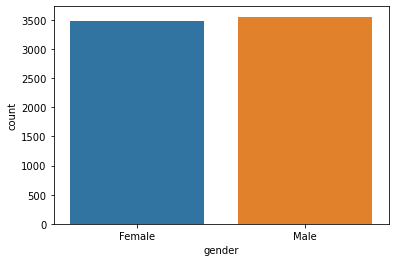

In [156]:
ax=sns.countplot(x='gender',data=df_nominal)
print(df['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


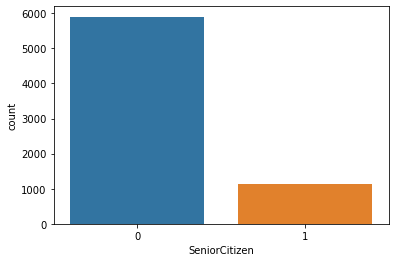

In [157]:
ax=sns.countplot(x='SeniorCitizen',data=df)
print(df['SeniorCitizen'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


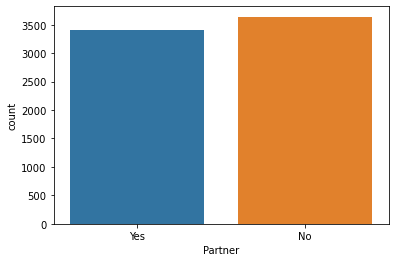

In [158]:
ax=sns.countplot(x='Partner',data=df)
print(df['Partner'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


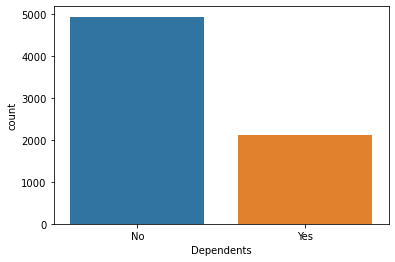

In [159]:
ax=sns.countplot(x='Dependents',data=df)
print(df['Dependents'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


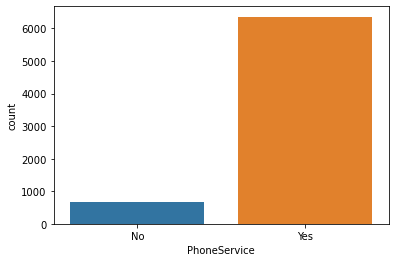

In [160]:
ax=sns.countplot(x='PhoneService',data=df)
print(df['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


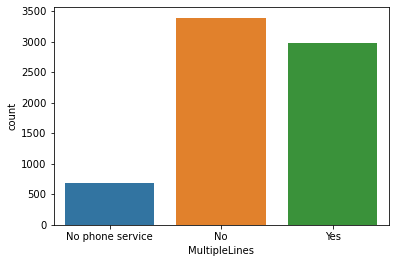

In [161]:
ax=sns.countplot(x='MultipleLines',data=df)
print(df['MultipleLines'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


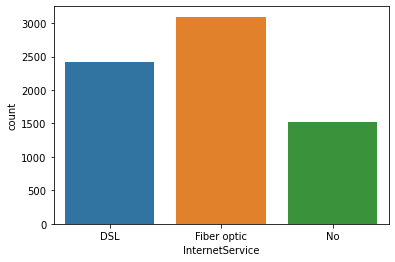

In [162]:
ax=sns.countplot(x='InternetService',data=df)
print(df['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


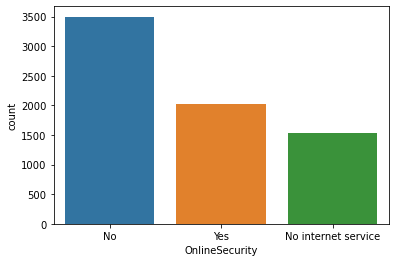

In [163]:
ax=sns.countplot(x='OnlineSecurity',data=df)
print(df['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


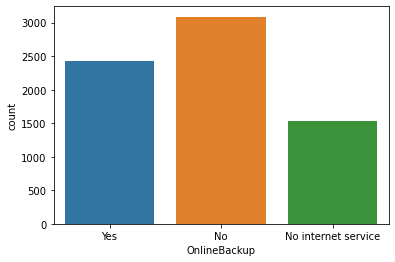

In [164]:
ax=sns.countplot(x='OnlineBackup',data=df)
print(df['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


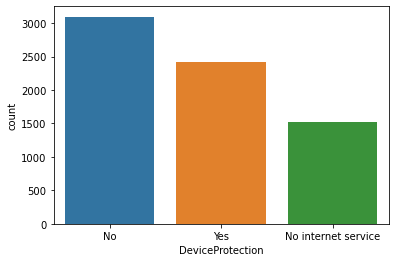

In [165]:
ax=sns.countplot(x='DeviceProtection',data=df)
print(df['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


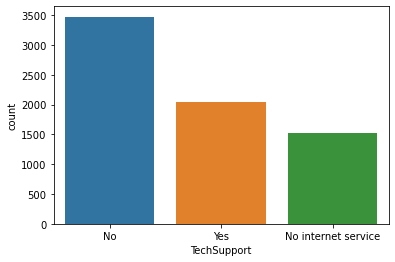

In [166]:
ax=sns.countplot(x='TechSupport',data=df)
print(df['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


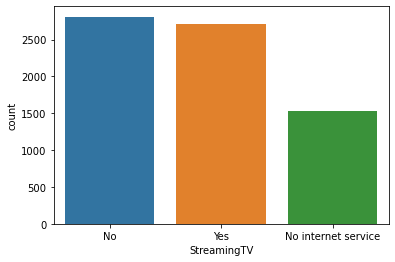

In [167]:
ax=sns.countplot(x='StreamingTV',data=df)
print(df['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


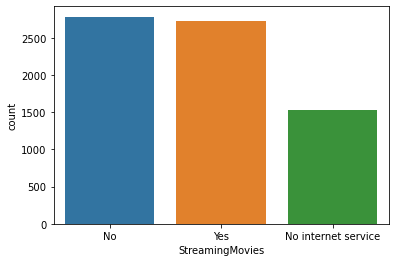

In [168]:
ax=sns.countplot(x='StreamingMovies',data=df)
print(df['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


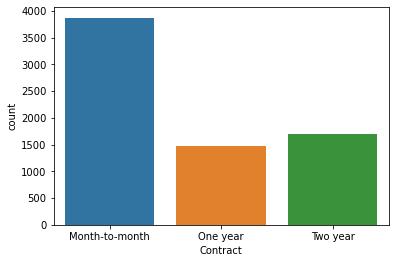

In [169]:
ax=sns.countplot(x='Contract',data=df)
print(df['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


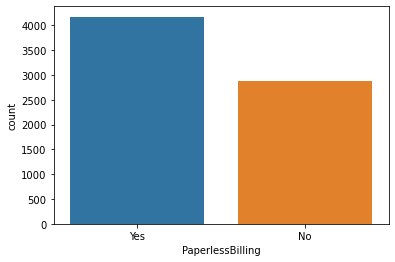

In [170]:
ax=sns.countplot(x='PaperlessBilling',data=df)
print(df['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


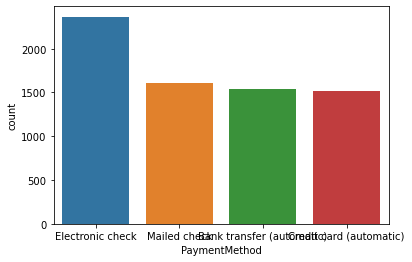

In [171]:
ax=sns.countplot(x='PaymentMethod',data=df)
print(df['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


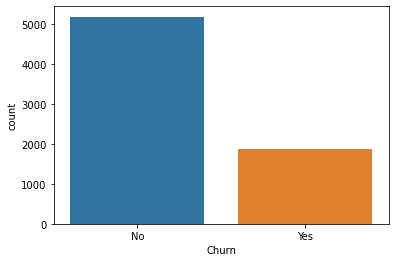

In [172]:
ax=sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

# Making Data Frame for Ordinal Data:

In [173]:
df_ord=df[['customerID','tenure']].copy()

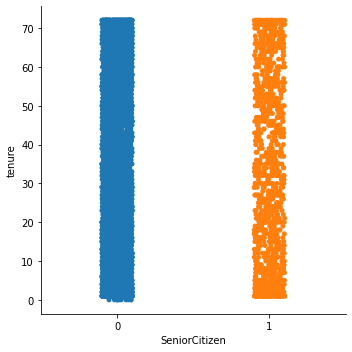

In [174]:
sns.catplot(x='SeniorCitizen',y='tenure',data=df)

# Checking the distribution of the continuous values of float type columns

In [175]:
df_cont=df[['MonthlyCharges','TotalCharges']].copy()

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

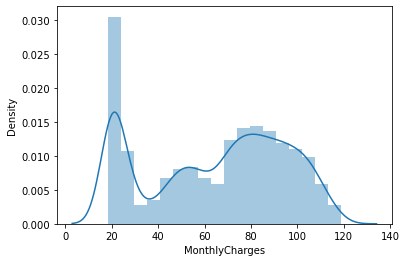

In [176]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot(df_cont['MonthlyCharges'])


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

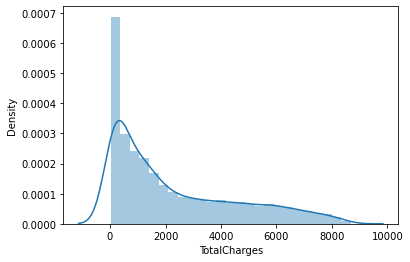

In [177]:
sns.distplot(df_cont['TotalCharges'])


# Encoding of Data Frame

As the maximum feature has the string data type so we will use encoder method to encode the categorical data into numerical data

In [178]:
from sklearn.preprocessing import OrdinalEncoder
lb_enc=OrdinalEncoder()

In [179]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lb_enc.fit_transform(df[i].values.reshape(-1,1)) # apply Ordinal encoder to all the column

In [180]:
df.head() # Recheking

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [181]:
df.describe().T # Checking the data set stats.

,count,mean,std,min,25%,50%,75%,max
customerID,7043.0,3521.000000,2033.283305,0.00,1760.500,3521.00,5281.50,7042.00
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.000,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.000,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.000,1.00,2.00,2.00


<AxesSubplot:>

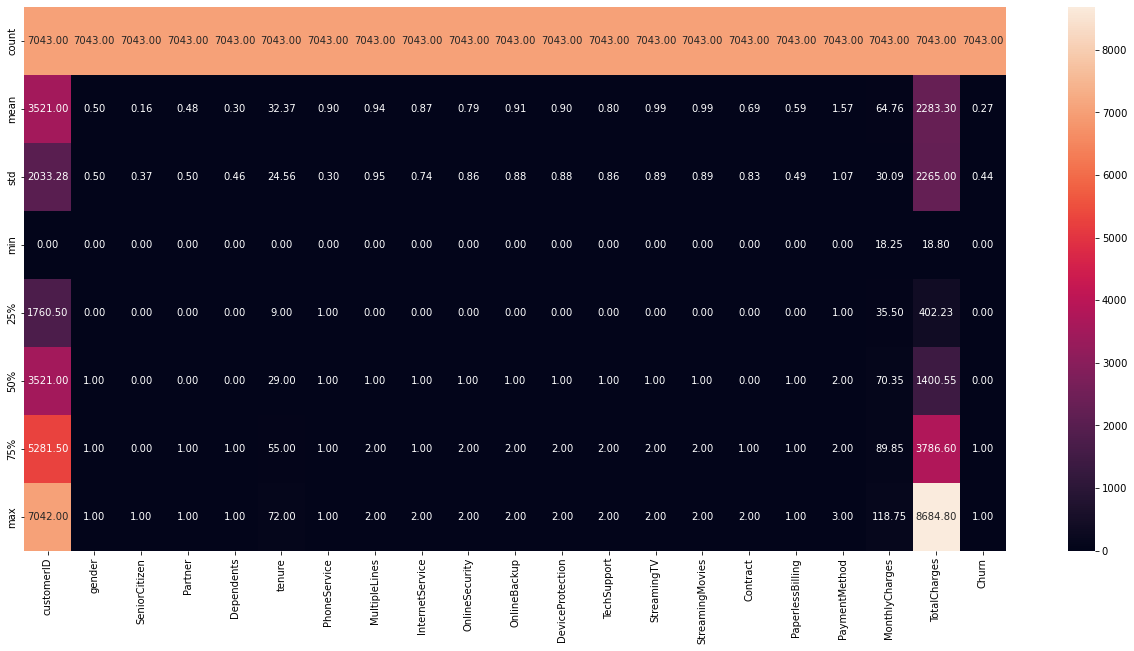

In [182]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt="0.2f")

# Correlation with Target Variable (Total Charges)

In [183]:
df.corr()['TotalCharges'].sort_values()

PaymentMethod      -0.330151
Churn              -0.199428
InternetService    -0.175429
customerID         -0.000270
gender              0.000048
Dependents          0.064535
SeniorCitizen       0.102395
PhoneService        0.112851
PaperlessBilling    0.157676
OnlineSecurity      0.254308
TechSupport         0.276713
Partner             0.318812
OnlineBackup        0.375362
DeviceProtection    0.388864
StreamingTV         0.392291
StreamingMovies     0.397909
Contract            0.449511
MultipleLines       0.452883
MonthlyCharges      0.650468
tenure              0.824757
TotalCharges        1.000000
Name: TotalCharges, dtype: float64

<AxesSubplot:>

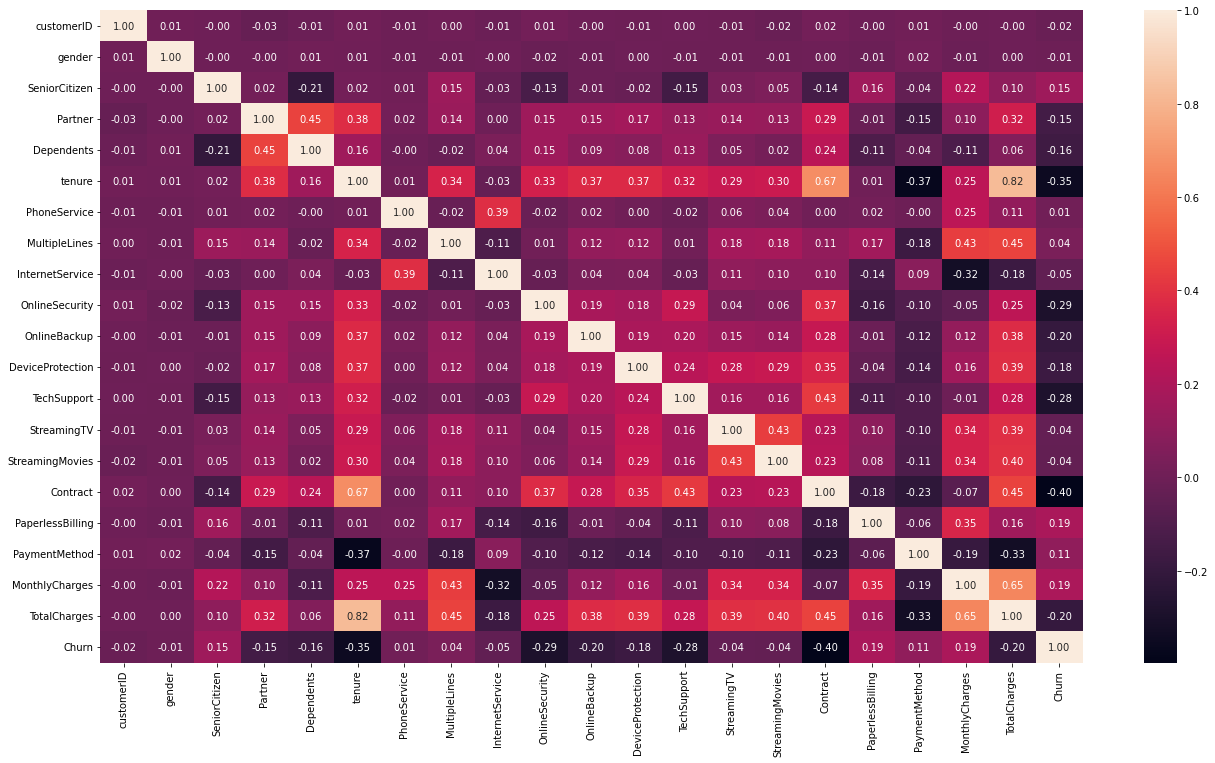

In [184]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22,12))
sns.heatmap(df.corr(),annot=True,fmt="0.2f")

Checking the features which are positively and negatively correate with target variable (Total Charges)

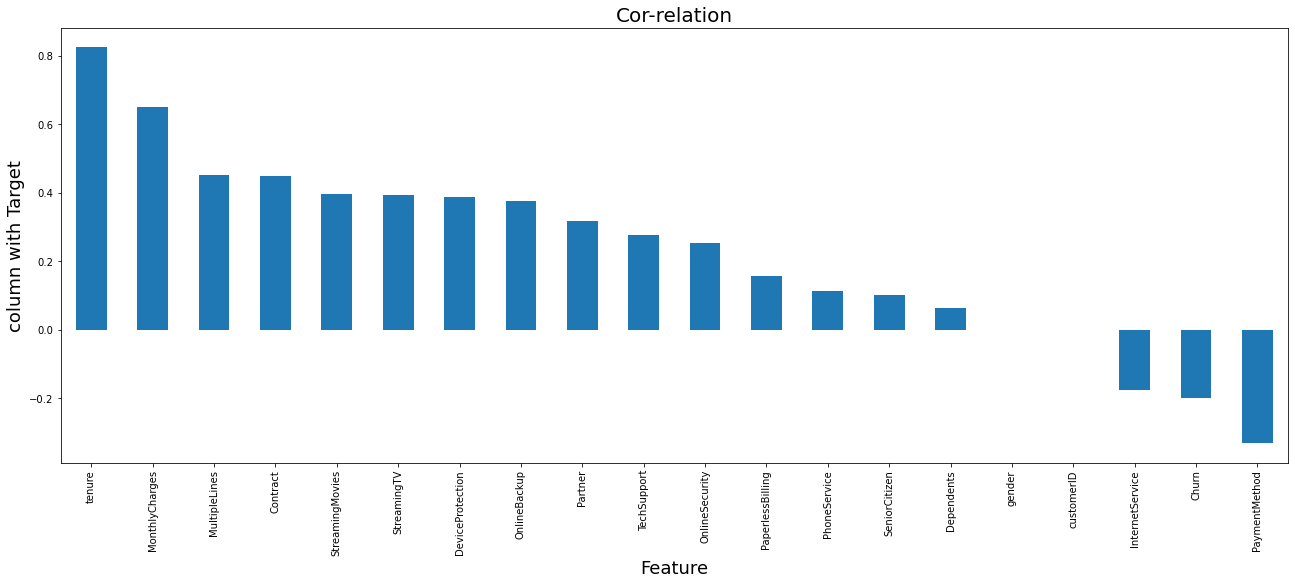

In [185]:
plt.figure(figsize=(22,8))
df.corr()['TotalCharges'].sort_values(ascending=False).drop(['TotalCharges']).plot(kind='bar')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('column with Target',fontsize=18)
plt.title('Cor-relation',fontsize=20)
plt.show()

In [186]:
df.skew() #checking skewness of this data set.

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

# Outlier Checking

In [187]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

<AxesSubplot:>

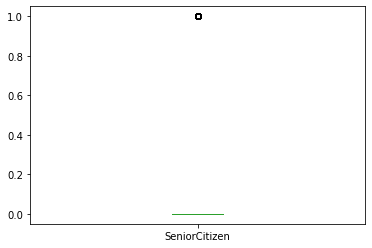

In [188]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

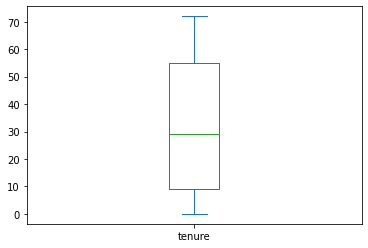

In [189]:
 df['tenure'].plot.box()

<AxesSubplot:>

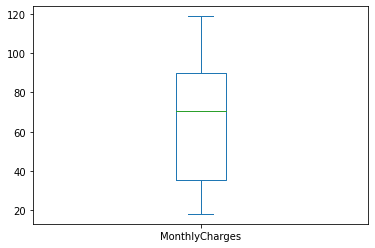

In [190]:
df['MonthlyCharges'].plot.box()

# Considering the Outlier Removal

In [191]:
df.shape

(7043, 21)

In [192]:
from scipy.stats import zscore # Using Z Score method for outlier removal.
z=np.abs(zscore(df))
thresold=3                     # Considering thresold as 3
np.where(z>3)  

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [193]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [194]:
# Data Loss after outlier removal.
Data_loss=((7043-6361)/7043)*100
Data_loss


9.683373562402386

# Seperating the columns into features and target

In [195]:
x=df.drop(['TotalCharges'],axis=1)
y=df['TotalCharges']

# Scaling the data using Min-Max Scaler:

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [198]:
mms_scaled=mms.fit_transform(x)
mms_scaled

array([[0.76327748, 0.        , 0.        , ..., 0.66666667, 0.11542289,
        0.        ],
       [0.56262425, 1.        , 0.        , ..., 1.        , 0.38507463,
        0.        ],
       [0.36410111, 1.        , 0.        , ..., 1.        , 0.35422886,
        1.        ],
       ...,
       [0.47813121, 0.        , 0.        , ..., 0.66666667, 0.11293532,
        0.        ],
       [0.84265834, 1.        , 1.        , ..., 1.        , 0.55870647,
        1.        ],
       [0.31610338, 1.        , 0.        , ..., 0.        , 0.86965174,
        0.        ]])

In [202]:
# for Training Score

for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print('At random state', i, 'the training accuracy is ',{r2_score(y_train,pred_train)})
    print('At random state', i, 'the testing accuracy is ',{r2_score(y_test,pred_test)})
    print('\n')

At random state 0 the training accuracy is  {0.9049923210585944}
At random state 0 the testing accuracy is  {0.9021798127771083}


At random state 1 the training accuracy is  {0.904917184339662}
At random state 1 the testing accuracy is  {0.9019063325679917}


At random state 2 the training accuracy is  {0.9057011726740728}
At random state 2 the testing accuracy is  {0.8996995563633459}


At random state 3 the training accuracy is  {0.9047450325782641}
At random state 3 the testing accuracy is  {0.9026489843969138}


At random state 4 the training accuracy is  {0.9032507096275094}
At random state 4 the testing accuracy is  {0.9071315680776829}


At random state 5 the training accuracy is  {0.9030657548671236}
At random state 5 the testing accuracy is  {0.9074857395695944}


At random state 6 the training accuracy is  {0.9026194473123603}
At random state 6 the testing accuracy is  {0.9091462233469572}


At random state 7 the training accuracy is  {0.9037696299042223}
At random state 7 t

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=11)

In [204]:
# train the Linear Regression Model:
lr.fit(x_train,y_train)

LinearRegression()

In [206]:
pred_test=lr.predict(x_test) # predict the score
pred_test

array([1867.59838772, 1631.65316004, -749.67325198, ...,  294.5502944 ,
        811.70727321, 1633.48055775])

In [208]:
print(r2_score(y_test,pred_test))

0.904241230674944


In [210]:
pred_train=lr.predict(x_train)
pred_train

array([-338.51352144, -375.32118098, 3214.26396386, ..., 6258.97287037,
       3894.75120492, 2864.39704507])

# Cross-Validation of the Model:

In [211]:
Train_Accuracy=r2_score(y_train,pred_train)
Test_Accuracy=r2_score(y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print('At cross fold', j, 'the cv score is ',cv_mean, 'and accuracy score for training is',Train_Accuracy,
          'and accuracy score for testing is ',Test_Accuracy)
    print('\n')

At cross fold 2 the cv score is  0.9033382537767014 and accuracy score for training is 0.9042724878404533 and accuracy score for testing is  0.904241230674944


At cross fold 3 the cv score is  0.9037012261875313 and accuracy score for training is 0.9042724878404533 and accuracy score for testing is  0.904241230674944


At cross fold 4 the cv score is  0.9037044584134895 and accuracy score for training is 0.9042724878404533 and accuracy score for testing is  0.904241230674944


At cross fold 5 the cv score is  0.9036665825623267 and accuracy score for training is 0.9042724878404533 and accuracy score for testing is  0.904241230674944


At cross fold 6 the cv score is  0.9037349024389357 and accuracy score for training is 0.9042724878404533 and accuracy score for testing is  0.904241230674944


At cross fold 7 the cv score is  0.9035677539347997 and accuracy score for training is 0.9042724878404533 and accuracy score for testing is  0.904241230674944


At cross fold 8 the cv score is  0

Here we have handled the problem of the overlifting and underlifting by checking the training and tetsing score.

# Ploting Graph between Actual Vs Predicted Charges

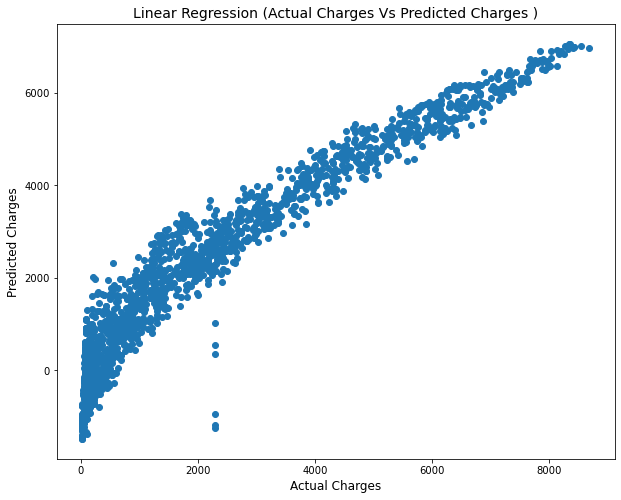

In [218]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(x=y_test,y=pred_test)
plt.xlabel('Actual Charges',fontsize=12)
plt.ylabel('Predicted Charges',fontsize=12)
plt.title('Linear Regression (Actual Charges Vs Predicted Charges )',fontsize=14)
plt.show()


# Regularization

In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [221]:
from sklearn.linear_model import Lasso

In [222]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],
           'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [223]:
# Final Model Training
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_training*100

90.42584554065573

In [225]:
pred_ls=ls.predict(x_test)
pred_ls

array([1881.10139592, 1633.10891298, -768.40621961, ...,  299.3688206 ,
        821.1283231 , 1625.9492598 ])

In [227]:
lss=r2_score(y_test,pred_ls)
lss*100

90.42247121409463

In [228]:
cv_score=cross_val_score(ls,x,y,cv=5) # Checking Cross_validation
cv_mean=cv_score.mean()
cv_mean*100

90.36629382160928

# Ensemble Techniques

In [230]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [233]:
rf=RandomForestRegressor(criterion='mse',max_features='auto') # Checking with best parameters
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 Score',rfs*100)


rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score',rfc*100)

print ('\n')


R2 Score 99.8696569152707
Cross Val Score 99.87377231999702




# We are getting R2 Score 99.86965 and Cross Val Score is 99.87 which shows our model is performing well with Random Forest Model.

In [241]:
'Diff between R2 Score and Cross Validation Score=', 99.87377231999702-99.8696569152707

('Diff between R2 Score and Cross Validation Score=', 0.0041154047263205484)

Diff between R2 Score and Cross Validation Score is very low, so We can say our model is performing well.

In [234]:
import pickle
filename='Customer Churn.pkl'
pickle.dump(rf,open(filename, 'wb'))